In [53]:
#importing the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [54]:
# Load the dataset

df = pd.read_csv('airlines_flights_data.csv')

In [55]:
# Some Basic information

print(df.info())
print(df.head())
print(df.isnull().sum()) #to know the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          

# Handle Missing Values

There is no missing values found in the dataset, so I'll skip handling.

If there's some Missing Values we can use mean, median, mode imputations to resolve it.

In [57]:
# Dropping the Unnecessary Columns

df.drop(columns=['index'], inplace=True) # index column is not an important feature for classification, so we drop it

In [58]:
# Encode Categorical Variables using One-Hot Encoding

categorical_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

df = pd.get_dummies(df, columns = categorical_columns, drop_first=True)

In [59]:
# Normalize Numerical Features

scaler = StandardScaler()
numerical_cols = ['duration', 'days_left', 'price']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


 Boxplots for Outlier Detection:


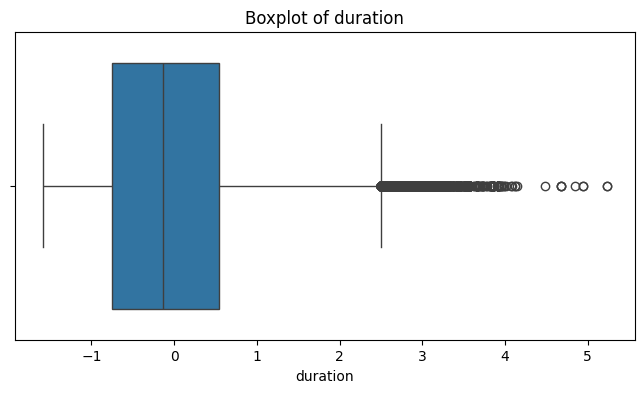

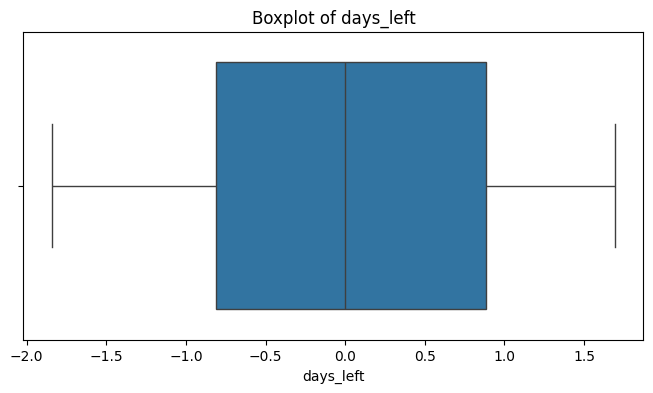

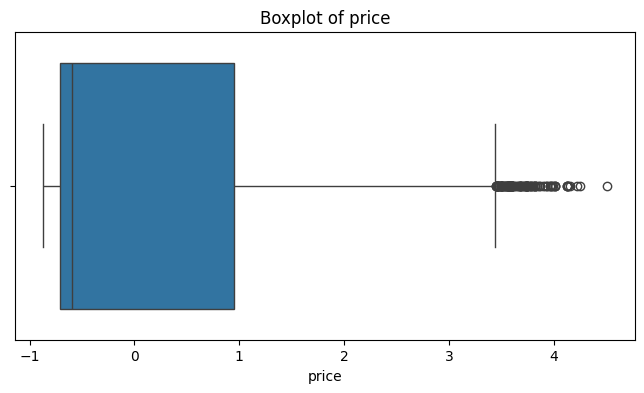

In [60]:
# Visualizing Outliers with Boxplots

print("\n Boxplots for Outlier Detection:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [61]:
# Removing Outliers Using IQR Method

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

for col in numerical_cols:
    before = df.shape[0]
    df = remove_outliers(df, col)
    after = df.shape[0]
    print(f" Removed {before - after} outliers from '{col}'")

 Removed 2110 outliers from 'duration'
 Removed 0 outliers from 'days_left'
 Removed 122 outliers from 'price'


In [62]:
# Step 10: Final Output
print(f"\n Final cleaned dataset shape: {df.shape}")


 Final cleaned dataset shape: (297921, 1591)
